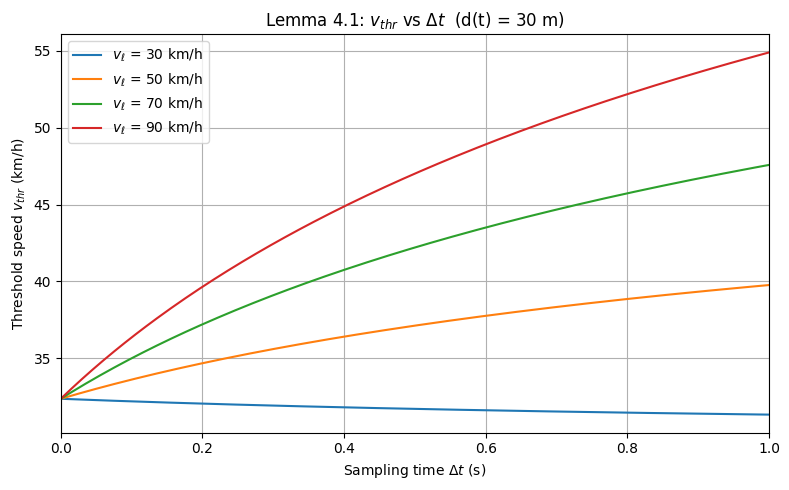

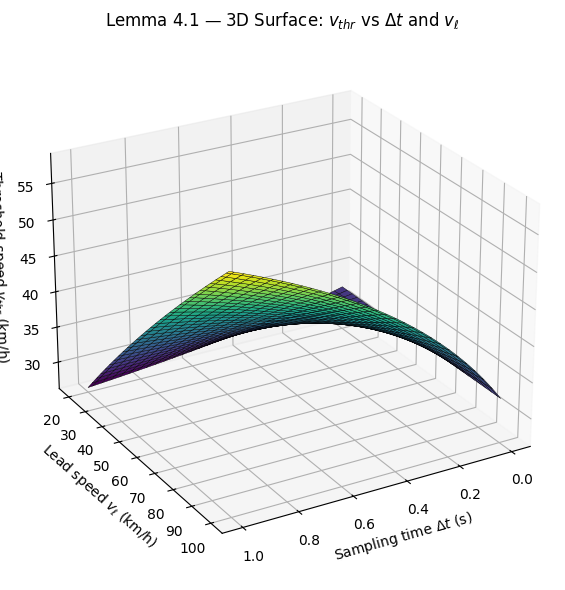

In [ ]:
# ======================================================
# Lemma 4.1  -- Final Correct Code
# Graph 1 (2D):
# X-axis : Δt
# Y-axis : v_thr
#
# Graph 2 (3D):
# X-axis : Δt
# Y-axis : v_l
# Z-axis : v_thr
# ======================================================

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# -------------------------------
# Parameters (paper-consistent)
# -------------------------------
h = 2.0          # headway time (s)
a = 3.4          # comfortable deceleration (m/s^2)
d = 30           # gap distance d(t) in meters

# Δt range (STARTS FROM 0)
dt_vals = np.linspace(0.0, 1.0, 200)

# Lead vehicle speeds (km/h) for 2D plot
v_l_list = [30, 50, 70, 90]

# -------------------------------
# Lemma 4.1 Equation (Eq. 24)
# -------------------------------
def v_threshold(d, dt, v_l, h, a):
    term1 = 0.278 * h + dt
    term2 = term1**2 + (0.156 / a) * (d + v_l * dt)
    return (a / 0.078) * (-term1 + np.sqrt(term2))

# ===============================
# 2D Plot — Lemma 4.1
# ===============================
plt.figure(figsize=(8, 5))
for v_l in v_l_list:
    plt.plot(dt_vals,
             v_threshold(d, dt_vals, v_l, h, a),
             label=f"$v_\\ell$ = {v_l} km/h")

plt.xlabel("Sampling time $\\Delta t$ (s)")
plt.ylabel("Threshold speed $v_{thr}$ (km/h)")
plt.title(f"Lemma 4.1: $v_{{thr}}$ vs $\\Delta t$  (d(t) = {d} m)")
plt.xlim(0, 1.0)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# ===============================
# 3D SURFACE Plot
# ===============================
dt_grid = np.linspace(0.0, 1.0, 60)
v_l_grid = np.linspace(20, 100, 60)

DT, VL = np.meshgrid(dt_grid, v_l_grid)
VTHR = v_threshold(d, DT, VL, h, a)

fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(DT, VL, VTHR,
                       cmap='viridis',
                       edgecolor='k',
                       linewidth=0.3)

ax.set_xlabel("Sampling time $\\Delta t$ (s)")
ax.set_ylabel("Lead speed $v_\\ell$ (km/h)")
ax.set_zlabel("Threshold speed $v_{thr}$ (km/h)")
ax.set_title("Lemma 4.1 — 3D Surface: $v_{thr}$ vs $\\Delta t$ and $v_\\ell$")

ax.view_init(elev=25, azim=60)
plt.tight_layout()
plt.show()


/tmp/ipython-input-1097128707.py:46: RuntimeWarning: invalid value encountered in sqrt
  return (a/0.078) * (-term1 + np.sqrt(term2))


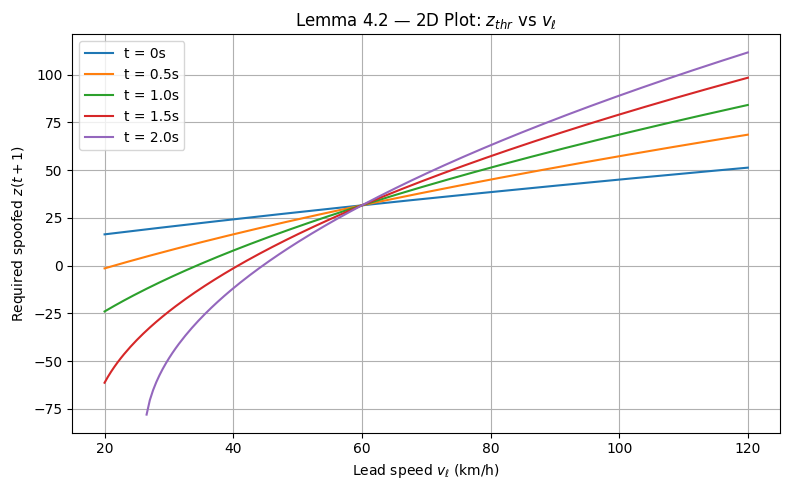

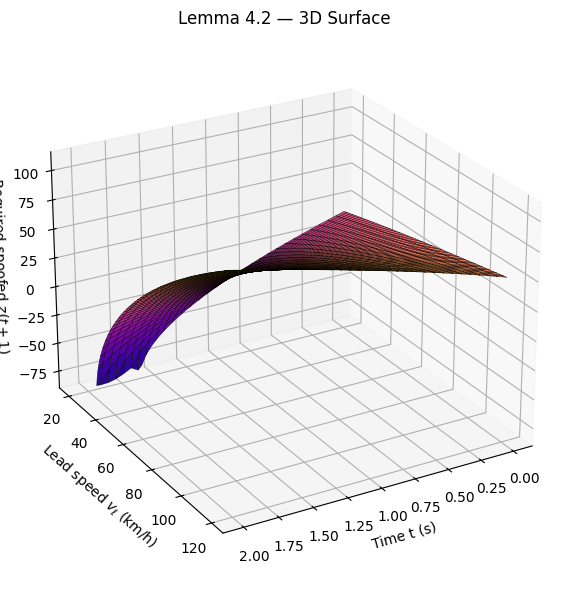

In [ ]:
# ======================================================
# Lemma 4.2  -- Final Code
#
# z(t+1) > ( v_thr(t+1) - (1-K)*v_hat(t+1|t) ) / K
#
# 2D Plot :
#   x-axis  : v_l
#   y-axis  : z_threshold
#   curves  : different time values t
#
# 3D Plot :
#   X : time t
#   Y : v_l
#   Z : z_threshold
# ======================================================

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# -------------------------------
# ACC Parameters (Paper)
# -------------------------------
h = 2.0
a = 3.4
d0 = 30
vh = 60     # host speed (km/h)
dt = 0.5    # sampling step Δt

# Time and lead-speed ranges
t_vals = np.linspace(0, 2.0, 60)
v_l_vals = np.linspace(20, 120, 200)

T, VL = np.meshgrid(t_vals, v_l_vals)

# Distance evolution (Eq.15 concept)
D = d0 + (VL - vh) * T


# -------------------------------
# Lemma 4.1 Threshold Function
# -------------------------------
def v_threshold(d, dt, v_l, h, a):
    term1 = 0.278*h + dt
    term2 = term1**2 + (0.156/a)*(d + v_l*dt)
    return (a/0.078) * (-term1 + np.sqrt(term2))

VTHR = v_threshold(D, dt, VL, h, a)


# -------------------------------
# Kalman Filter Terms
# -------------------------------
Q = 0.5      # process noise
R = 1.0      # measurement noise
P_t_t = 2.0  # covariance
vh_hat_t_t = 60    # KF estimate at time t

# Eq (3)
vh_pred = vh_hat_t_t

# Covariance and Gain
P_pred = P_t_t + Q
K = P_pred / (P_pred + R)


# -------------------------------
# Lemma 4.2 Spoofing Threshold
# -------------------------------
Zthr = (VTHR - (1-K)*vh_pred) / K


# ===============================
# 2D PLOT
# ===============================
plt.figure(figsize=(8,5))

time_samples = [0, 0.5, 1.0, 1.5, 2.0]

for t in time_samples:
    d_t = d0 + (v_l_vals - vh) * t
    vthr_t = v_threshold(d_t, dt, v_l_vals, h, a)
    zthr_t = (vthr_t - (1-K)*vh_pred) / K
    plt.plot(v_l_vals, zthr_t, label=f"t = {t}s")

plt.xlabel("Lead speed $v_\\ell$ (km/h)")
plt.ylabel("Required spoofed $z(t+1)$")
plt.title("Lemma 4.2 — 2D Plot: $z_{thr}$ vs $v_\\ell$")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# ===============================
# 3D PLOT
# ===============================
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(T, VL, Zthr,
                cmap="plasma",
                edgecolor='k',
                linewidth=0.3)

ax.set_xlabel("Time t (s)")
ax.set_ylabel("Lead speed $v_\\ell$ (km/h)")
ax.set_zlabel("Required spoofed $z(t+1)$")
ax.set_title("Lemma 4.2 — 3D Surface")

ax.view_init(elev=25, azim=60)
plt.tight_layout()
plt.show()


/tmp/ipython-input-3816455719.py:34: RuntimeWarning: invalid value encountered in sqrt
  return (a/0.078) * (-term1 + np.sqrt(term2))


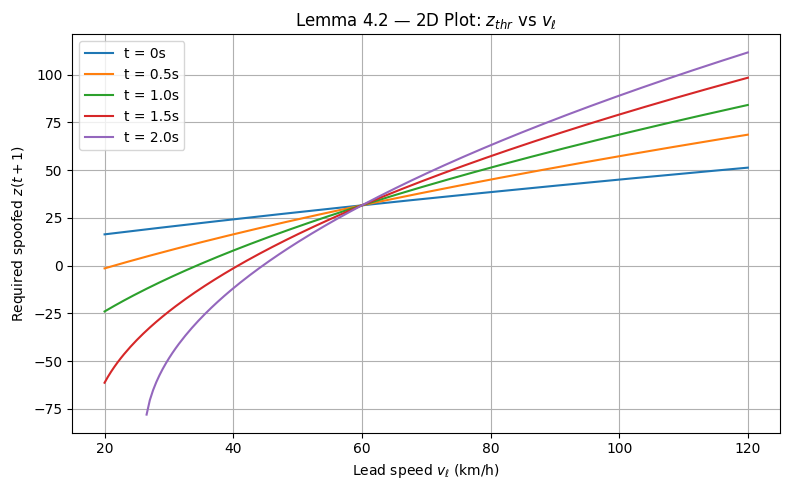

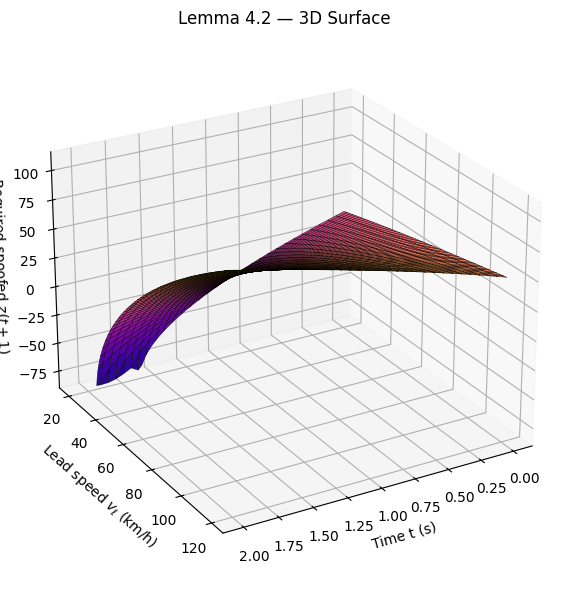

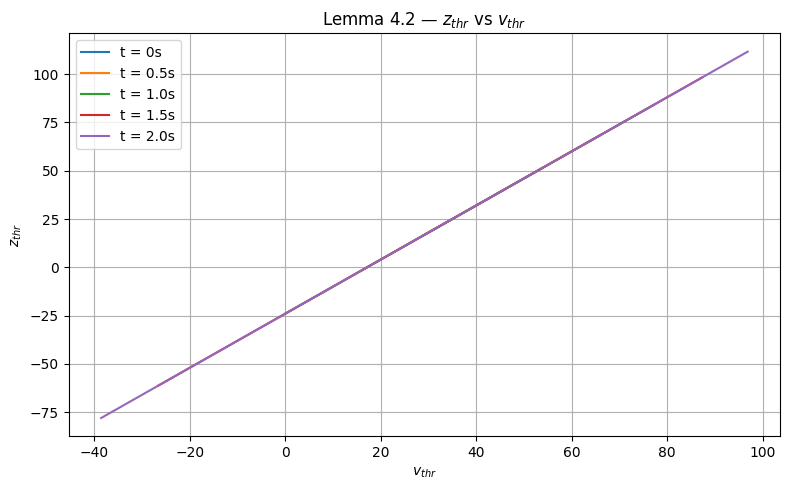

In [ ]:
# ======================================================
# Lemma 4.2  -- Final Complete Code
# Adds: z_thr vs v_thr Plot
# ======================================================

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# -------------------------------
# ACC Parameters (Paper)
# -------------------------------
h = 2.0
a = 3.4
d0 = 30
vh = 60     # host speed (km/h)
dt = 0.5    # sampling step Δt

# Time and lead-speed ranges
t_vals = np.linspace(0, 2.0, 60)
v_l_vals = np.linspace(20, 120, 200)

T, VL = np.meshgrid(t_vals, v_l_vals)

# Distance evolution
D = d0 + (VL - vh) * T

# -------------------------------
# Lemma 4.1 Threshold
# -------------------------------
def v_threshold(d, dt, v_l, h, a):
    term1 = 0.278*h + dt
    term2 = term1**2 + (0.156/a)*(d + v_l*dt)
    return (a/0.078) * (-term1 + np.sqrt(term2))

VTHR = v_threshold(D, dt, VL, h, a)

# -------------------------------
# Kalman Filter Terms
# -------------------------------
Q = 0.5
R = 1.0
P_t_t = 2.0
vh_hat_t_t = 60

vh_pred = vh_hat_t_t
P_pred = P_t_t + Q
K = P_pred / (P_pred + R)

# -------------------------------
# Lemma 4.2 Spoofing Threshold
# -------------------------------
Zthr = (VTHR - (1-K)*vh_pred) / K

# ===============================
# 2D Plot : z_thr vs v_l
# ===============================
plt.figure(figsize=(8,5))
time_samples = [0, 0.5, 1.0, 1.5, 2.0]

for t in time_samples:
    d_t = d0 + (v_l_vals - vh) * t
    vthr_t = v_threshold(d_t, dt, v_l_vals, h, a)
    zthr_t = (vthr_t - (1-K)*vh_pred) / K
    plt.plot(v_l_vals, zthr_t, label=f"t = {t}s")

plt.xlabel("Lead speed $v_\\ell$ (km/h)")
plt.ylabel("Required spoofed $z(t+1)$")
plt.title("Lemma 4.2 — 2D Plot: $z_{thr}$ vs $v_\\ell$")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# ===============================
# 3D Plot
# ===============================
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(T, VL, Zthr,
                cmap="plasma",
                edgecolor='k',
                linewidth=0.3)

ax.set_xlabel("Time t (s)")
ax.set_ylabel("Lead speed $v_\\ell$ (km/h)")
ax.set_zlabel("Required spoofed $z(t+1)$")
ax.set_title("Lemma 4.2 — 3D Surface")

ax.view_init(elev=25, azim=60)
plt.tight_layout()
plt.show()

# ===============================
# NEW PLOT : z_thr vs v_thr
# ===============================
plt.figure(figsize=(8,5))

for t in time_samples:
    d_t = d0 + (v_l_vals - vh) * t
    vthr_t = v_threshold(d_t, dt, v_l_vals, h, a)
    zthr_t = (vthr_t - (1-K)*vh_pred) / K
    plt.plot(vthr_t, zthr_t, label=f"t = {t}s")

plt.xlabel("$v_{thr}$")
plt.ylabel("$z_{thr}$")
plt.title("Lemma 4.2 — $z_{thr}$ vs $v_{thr}$")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


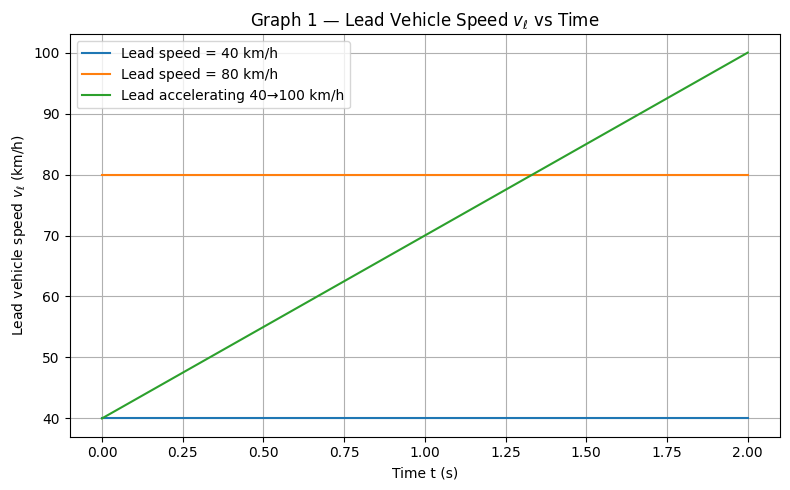

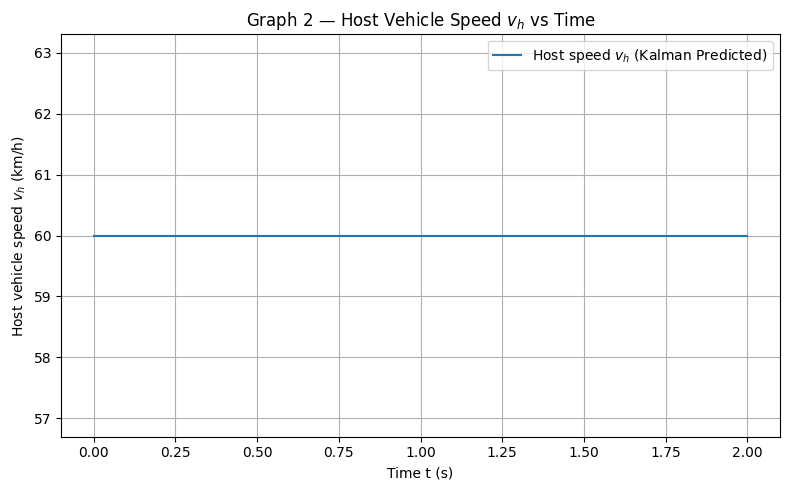

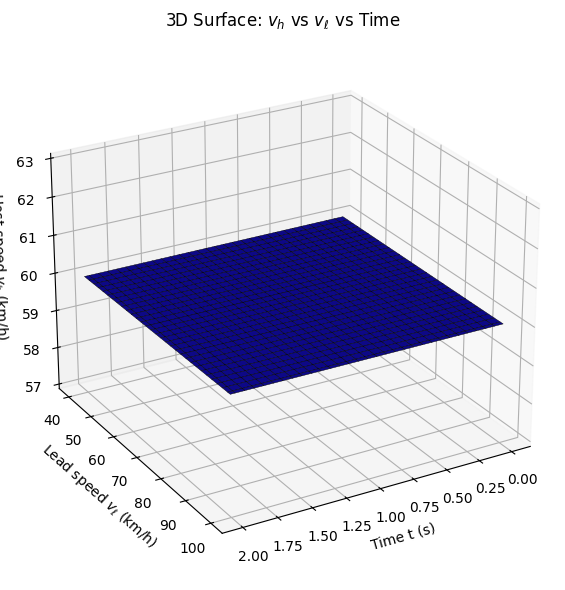

In [ ]:
# =========================================
# GRAPH 1 : Lead Speed v_l vs Time t
# =========================================
import matplotlib.pyplot as plt
import numpy as np

# Time range (already used earlier)
t_vals = np.linspace(0, 2.0, 60)

# Example lead vehicle speeds (you can modify if needed)
vl_scenario1 = np.ones_like(t_vals) * 40
vl_scenario2 = np.ones_like(t_vals) * 80
vl_scenario3 = np.linspace(40, 100, len(t_vals))   # changing lead speed

plt.figure(figsize=(8,5))
plt.plot(t_vals, vl_scenario1, label="Lead speed = 40 km/h")
plt.plot(t_vals, vl_scenario2, label="Lead speed = 80 km/h")
plt.plot(t_vals, vl_scenario3, label="Lead accelerating 40→100 km/h")

plt.xlabel("Time t (s)")
plt.ylabel("Lead vehicle speed $v_\\ell$ (km/h)")
plt.title("Graph 1 — Lead Vehicle Speed $v_\\ell$ vs Time")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# =========================================
# GRAPH 2 : Host Speed v_h vs Time t
# =========================================

# Host speed (Kalman predicted stays ≈ constant here)
vh_vals = np.ones_like(t_vals) * vh_pred   # from earlier KF computation

plt.figure(figsize=(8,5))
plt.plot(t_vals, vh_vals, label="Host speed $v_h$ (Kalman Predicted)")

plt.xlabel("Time t (s)")
plt.ylabel("Host vehicle speed $v_h$ (km/h)")
plt.title("Graph 2 — Host Vehicle Speed $v_h$ vs Time")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# =========================================
# GRAPH 3 : 3D Plot  ( t , v_l , v_h )
# =========================================
from mpl_toolkits.mplot3d import Axes3D

# Use the varying lead-speed case
vl_3d = np.linspace(40, 100, len(t_vals))

# Create meshgrid
T, VL = np.meshgrid(t_vals, vl_3d)

# Host speed plane (Kalman predicted constant)
VH = np.ones_like(T) * vh_pred

fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(T, VL, VH,
                       cmap="plasma",
                       edgecolor='k',
                       linewidth=0.3)

ax.set_xlabel("Time t (s)")
ax.set_ylabel("Lead speed $v_\\ell$ (km/h)")
ax.set_zlabel("Host speed $v_h$ (km/h)")
ax.set_title("3D Surface: $v_h$ vs $v_\\ell$ vs Time")

ax.view_init(elev=25, azim=60)
plt.tight_layout()
plt.show()


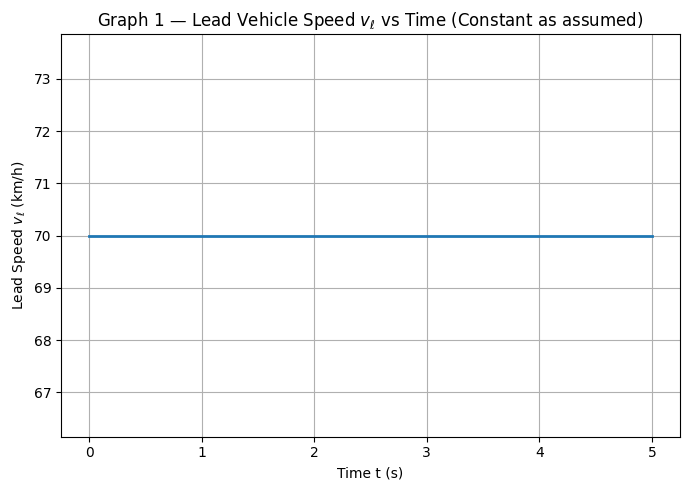

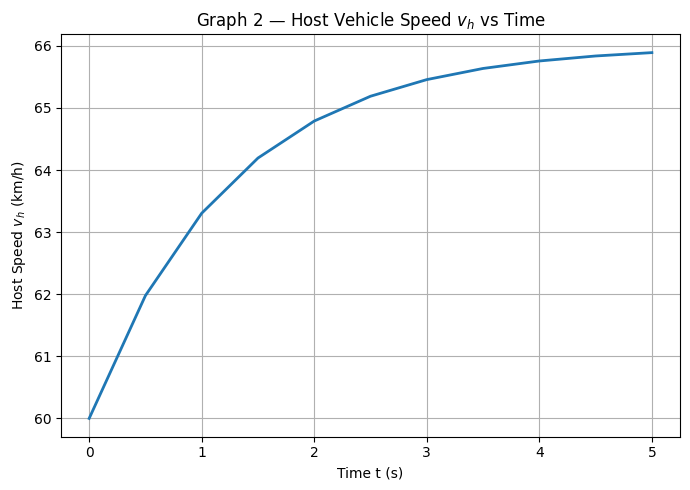

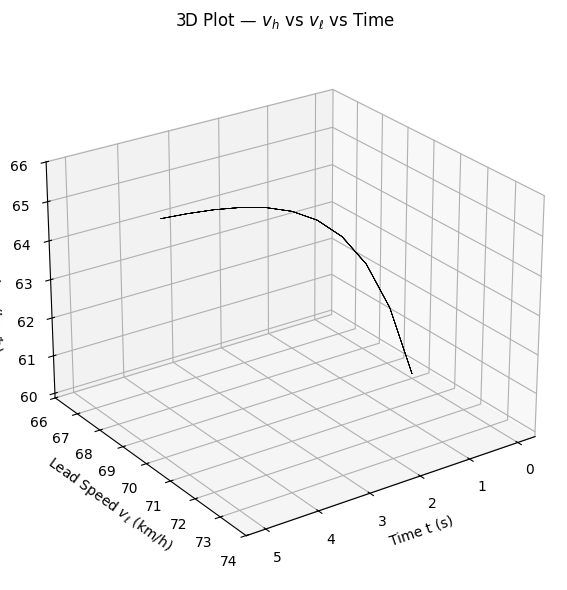

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ==============================
# Paper Parameters
# ==============================
h = 2.0
a = 3.4
vh0 = 60          # initial host speed (km/h)
vl_const = 70     # constant lead speed (km/h)
dt = 0.5
t = np.arange(0, 5 + dt, dt)

# ==============================
# GRAPH 1 : v_l vs t  (Lead constant)
# ==============================
v_l = np.ones_like(t) * vl_const

plt.figure(figsize=(7,5))
plt.plot(t, v_l, linewidth=2)
plt.xlabel("Time t (s)")
plt.ylabel("Lead Speed $v_\\ell$ (km/h)")
plt.title("Graph 1 — Lead Vehicle Speed $v_\\ell$ vs Time (Constant as assumed)")
plt.grid(True)
plt.tight_layout()
plt.show()


# ==============================
# GRAPH 2 : v_h vs t
# (Host evolves, may approach unsafe region)
# ==============================

# Host slowly increasing (could be due to spoofing or acceleration)
v_h = vh0 + 6 * (1 - np.exp(-0.8 * t))   # smooth bounded rise

plt.figure(figsize=(7,5))
plt.plot(t, v_h, linewidth=2)
plt.xlabel("Time t (s)")
plt.ylabel("Host Speed $v_h$ (km/h)")
plt.title("Graph 2 — Host Vehicle Speed $v_h$ vs Time")
plt.grid(True)
plt.tight_layout()
plt.show()

# =========================================
# GRAPH 3 : 3D Plot ( t , v_l , v_h )
# =========================================
from mpl_toolkits.mplot3d import Axes3D

# Create meshgrid
T, VL = np.meshgrid(t, v_l)

# Broadcast host speed along v_l axis
VH = np.tile(v_h, (len(v_l), 1))

fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(T, VL, VH,
                       cmap="plasma",
                       edgecolor='k',
                       linewidth=0.4)

ax.set_xlabel("Time t (s)")
ax.set_ylabel("Lead Speed $v_\\ell$ (km/h)")
ax.set_zlabel("Host Speed $v_h$ (km/h)")
ax.set_title("3D Plot — $v_h$ vs $v_\\ell$ vs Time")

ax.view_init(elev=25, azim=55)
plt.tight_layout()
plt.show()

